**Workflow Summary**
1. Preparation & Cleaning 🧹

*   Data Ingestion: Uploading and loading the sales_data_sample.csv file.
*   Initial Audit: Inspecting the data structure and types.
*   Standardization: Cleaning column names (lowercase, underscores).
*   Type Conversion: Converting the orderdate column to a datetime object.
*    Missing Data Handling: Identifying and dropping columns with many missing values.





In [ ]:
from google.colab import files
uploaded = files.upload("retail_sales")

Saving sales_data_sample .csv to retail_sales/sales_data_sample .csv


In [ ]:
import pandas as pd

df = pd.read_csv("retail_sales/sales_data_sample .csv", encoding='latin1')

print(df.head())
print(df.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
# Clean up column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the new column names to confirm
print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')


In [ ]:
# Check the current data types of all columns
print("\nOriginal data types:")
df.info()

# Convert the 'orderdate' column to a proper datetime format
# The 'coerce' option will turn any unparseable dates into NaT (Not a Time)
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')

# Verify the change
print("\nUpdated data types:")
df.info()


Original data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      30

In [ ]:
# Count missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64


In [ ]:
# Create a list of columns to drop
columns_to_drop = ['addressline2', 'state', 'territory', 'postalcode']

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Verify that the columns have been removed
print("Columns have been dropped. Here is the updated DataFrame info:")
df.info()

Columns have been dropped. Here is the updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   priceeach         2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   status            2823 non-null   object        
 7   qtr_id            2823 non-null   int64         
 8   month_id          2823 non-null   int64         
 9   year_id           2823 non-null   int64         
 10  productline       2823 non-null   object        
 11  msrp              2823 non-null   int64         
 12  productcode       2823 non-null   object        
 13  customername   

2. Exploratory Data Analysis (EDA) 📊

* Descriptive Statistics: Summarizing numerical data distribution.

* Sales Trends: Visualizing total sales by Month, Product Line, and Deal Size to understand performance and key segments.

* Relationships: Using a Correlation Heatmap to visualize linear relationships between numerical variables.

In [ ]:
# Get descriptive statistics for numerical columns
print("\nStatistical summary:")
display(df.describe())


Statistical summary:


,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,qtr_id,month_id,year_id,msrp
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


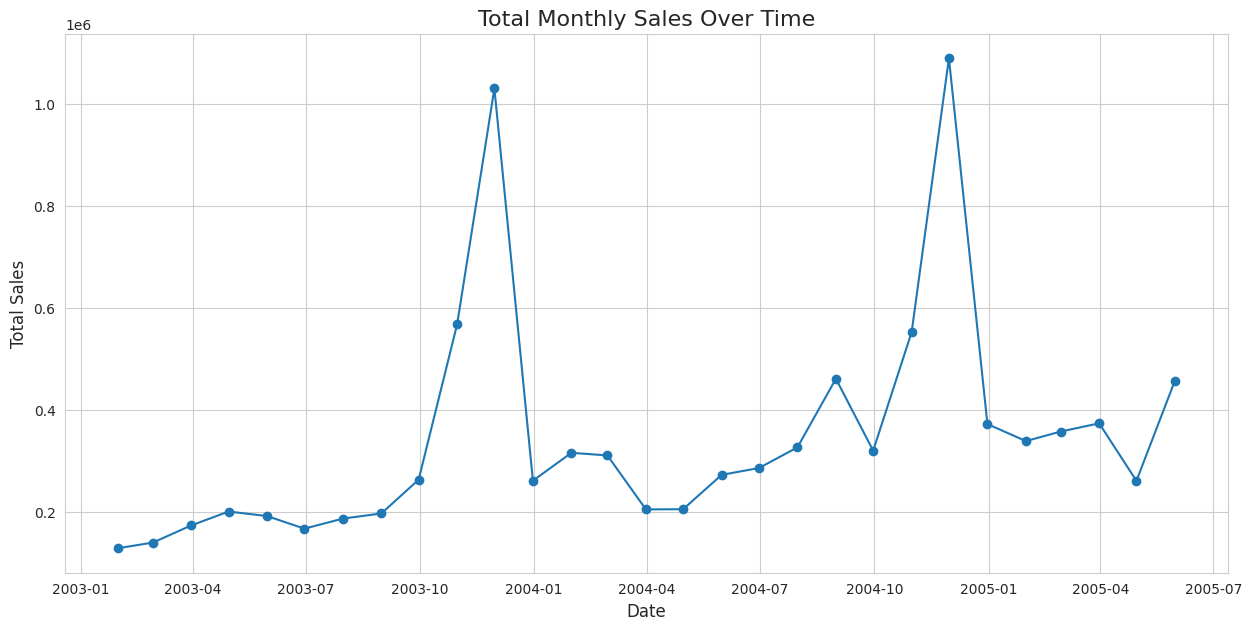

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style("whitegrid")

# --- Monthly Sales Analysis ---

# We resample the data by Month End ('ME') to sum up the sales for each month.
# This replaces the deprecated 'M' frequency.
monthly_sales = df.resample('ME', on='orderdate')['sales'].sum()

# Create the plot
plt.figure(figsize=(15, 7))

# Plot the data directly using the index from monthly_sales
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Add a title and labels
plt.title('Total Monthly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

/tmp/ipython-input-3764558233.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


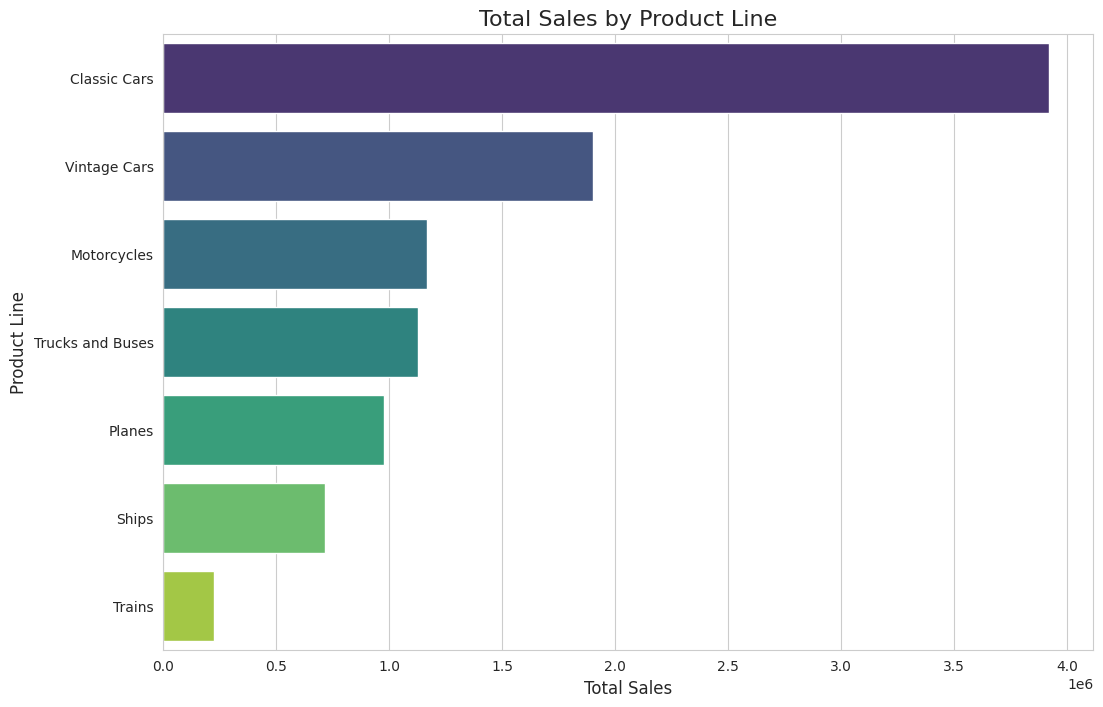

In [ ]:
# --- Top Product Lines Analysis ---

# Group data by 'productline', sum the 'sales' for each, and sort them
top_products = df.groupby('productline')['sales'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Add a title and labelsþwh
plt.title('Total Sales by Product Line', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Line', fontsize=12)

# Display the plot
plt.show()

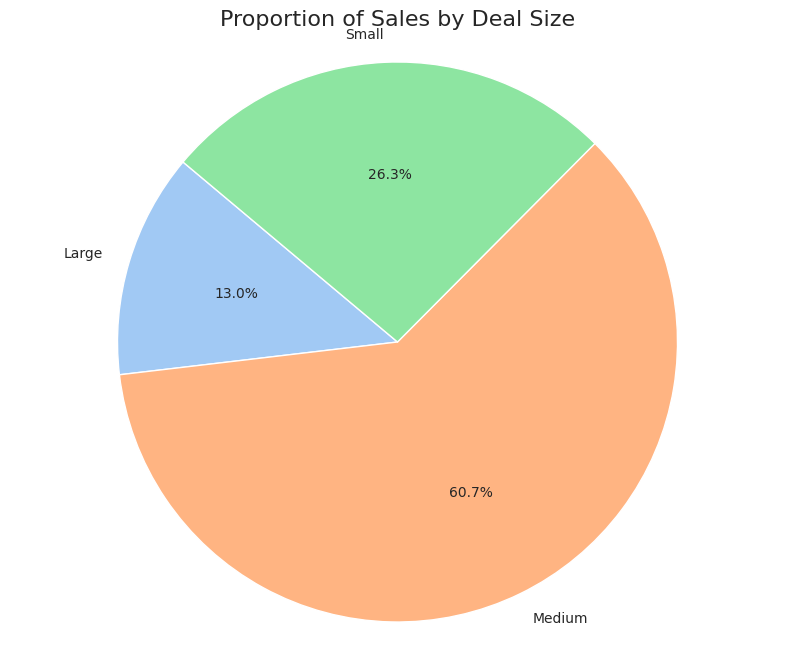

In [ ]:
# --- Sales by Deal Size Analysis ---

# Group data by 'dealsize' and sum the 'sales'
deal_size_sales = df.groupby('dealsize')['sales'].sum()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(deal_size_sales, labels=deal_size_sales.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))

# Add a title
plt.title('Proportion of Sales by Deal Size', fontsize=16)
plt.ylabel('') # Hides the 'sales' label on the y-axis for a cleaner look

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

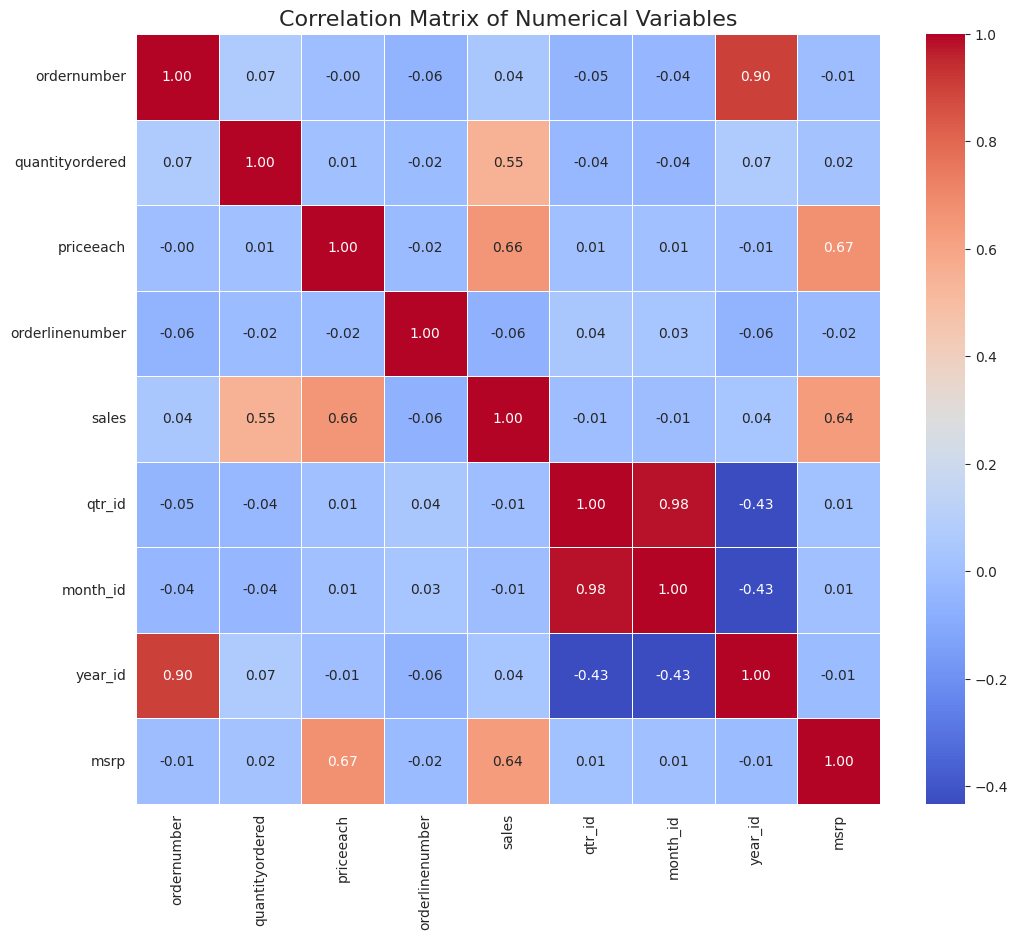

In [ ]:
# --- Correlation Analysis ---

# Select only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add a title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

# Display the plot
plt.show()

3. Time-Series Forecasting 🔮

* Pre-Forecasting Checks: Performing a Stationarity Check (ADF test) on the monthly sales data, which is essential for ARIMA models.

* Model Identification: Generating ACF and PACF plots to help determine the optimal parameters for the ARIMA model.

* Model Building: Training an ARIMA(1, 0, 1) model on the historical data.

* Evaluation: Forecasting sales and visualizing the results against the actual test data to assess model performance.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# --- Stationarity Check ---

# 1. Prepare the time-series data (we've done this before for plotting)
# We use 'MS' for Month Start frequency, which is standard for modeling.
monthly_sales = df.resample('MS', on='orderdate')['sales'].sum()

# 2. Perform the Augmented Dickey-Fuller test
print('Running Augmented Dickey-Fuller Test:')
adf_test = adfuller(monthly_sales, autolag='AIC')

# 3. Print the results
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'\t{key}: {value}')

# 4. Interpret the p-value
if adf_test[1] <= 0.05:
    print("\nResult: The data is likely stationary (p-value <= 0.05). We can proceed with modeling.")
else:
    print("\nResult: The data is likely non-stationary (p-value > 0.05). We need to apply differencing.")

Running Augmented Dickey-Fuller Test:
ADF Statistic: -3.628783174623225
p-value: 0.005234006614207446
Critical Values:
	1%: -3.6889256286443146
	5%: -2.9719894897959187
	10%: -2.6252957653061224

Result: The data is likely stationary (p-value <= 0.05). We can proceed with modeling.


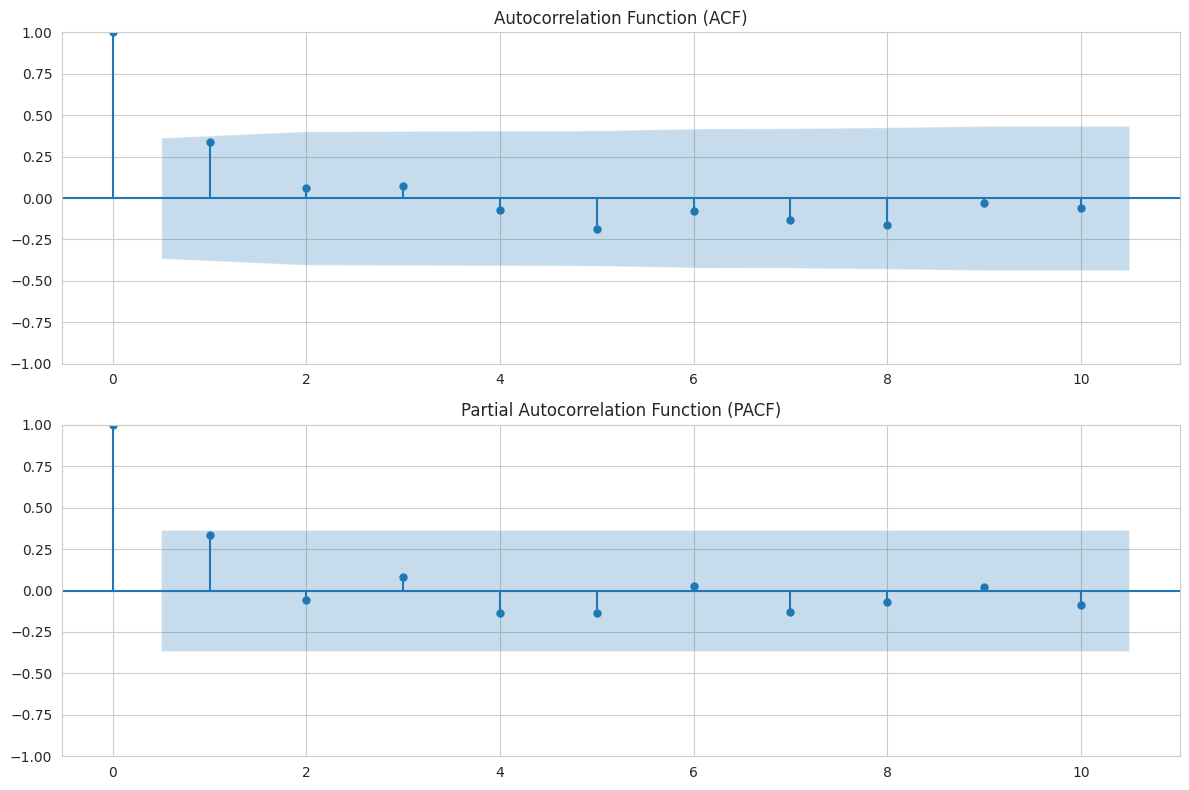

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# --- Generate ACF and PACF Plots ---

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF
plot_acf(monthly_sales, ax=ax1, lags=10) # We'll check up to 10 lags
ax1.set_title('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(monthly_sales, ax=ax2, lags=10) # We'll check up to 10 lags
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Display the plots
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


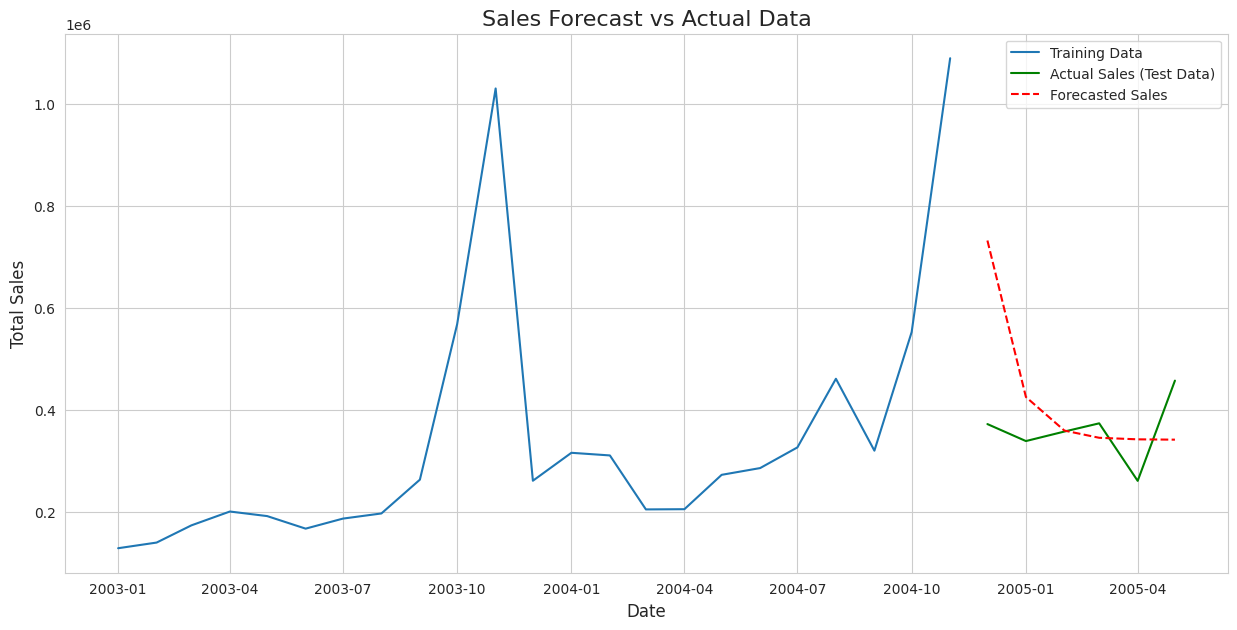

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# --- Build and Train the Model ---

# 1. Split data into training and testing sets (80% train, 20% test)
split_point = int(len(monthly_sales) * 0.8)
train_data, test_data = monthly_sales[0:split_point], monthly_sales[split_point:]

# 2. Build the ARIMA(1, 0, 1) model
# We use the training data to build the model
model = ARIMA(train_data, order=(1, 0, 1))

# 3. Train the model
model_fit = model.fit()

# 4. Make predictions
# We ask the model to predict the values for the same time period as our test data
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# --- Visualize the Results ---

# Create the plot
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Sales (Test Data)', color='green')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red', linestyle='--')

# Add a title, labels, and legend
plt.title('Sales Forecast vs Actual Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()